In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings


In [2]:
#warnings.filterwarnings("ignore")

In [3]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])


In [4]:
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])
attribute_data.head(5)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F


In [5]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.groupby(['StudentID1', 'StudentID2']).size().reset_index(name="Contacts")

# Create weights using 1/contacts to have people who are more social with eachother closer than people who hardly socialize with eachother
weighted_data["weight"] = 1 / weighted_data["Contacts"]

weighted_data.head(5)

,StudentID1,StudentID2,Contacts,weight
0,1,55,8,0.125000
1,1,63,2,0.500000
2,1,101,1,1.000000
3,1,106,4,0.250000
4,1,117,18,0.055556


In [6]:
zip_iter = zip(attribute_data['studentID'].tolist(), attribute_data['Gender'].tolist())
a_dict = dict(zip_iter)

In [7]:
g = nx.from_pandas_edgelist(weighted_data, 
                            source='StudentID1', 
                            target='StudentID2', 
                            create_using = nx.MultiDiGraph(),
                            edge_attr = ["Contacts", "weight"]
                           ) 

In [8]:
for key,n in g.nodes.items():
    n["Gender"]=a_dict[key]

In [9]:
g.node[106]

{'Gender': 'F'}

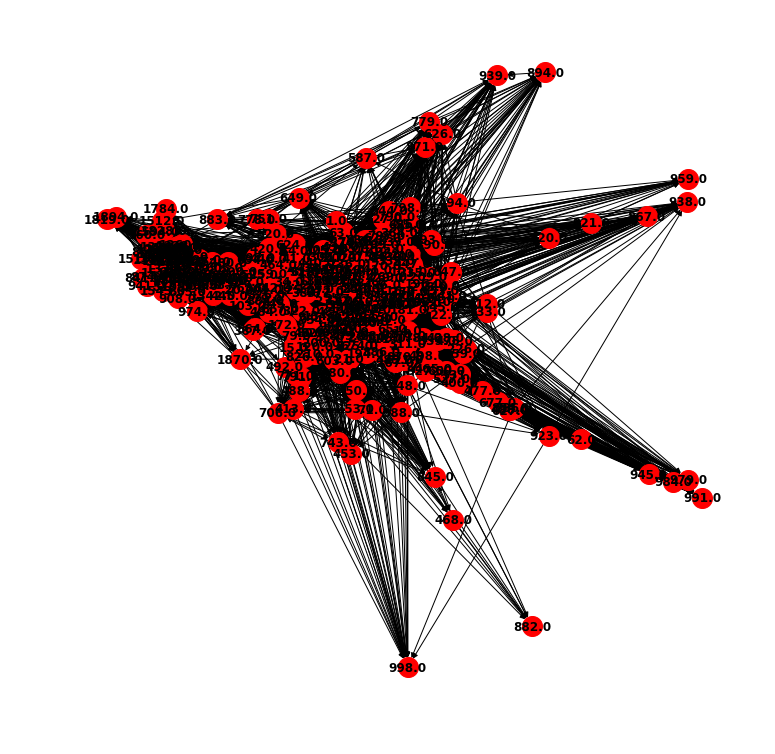

In [10]:
plt.figure(figsize = (10,10))
nx.draw(g, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')

In [11]:
sub_g = nx.subgraph(g,
                    ((source) for source, target, attr in g.edges(data=True) 
                    if attr['weight'] < 0.01))

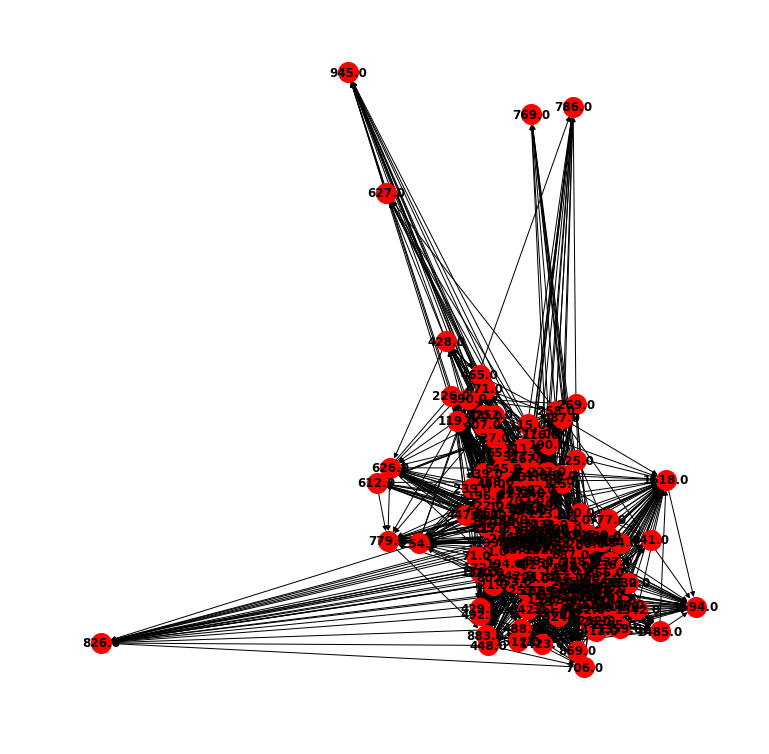

In [12]:
plt.figure(figsize = (10,10))
nx.draw(sub_g, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')

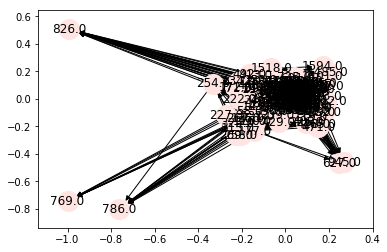

In [13]:
#pos=nx.spring_layout(sub_g,k=0.05,seed=42)
pos=nx.spring_layout(sub_g,k=0.05)
nx.draw_networkx(sub_g,
                   pos,
                   with_labels=True,
                   node_size=400,
                   node_color="mistyrose",
                   #edgelist=edges, 
                   #edge_color=weights,
                   edge_cmap=plt.cm.Blues_r,
                   style="solid",
                   width=1)

In [14]:
sub_g.node[769]

{'Gender': 'M'}

In [15]:
### 

In [16]:
## students degree centrality

In [17]:
deg=nx.degree(g)
deg_s = dict(sorted(dict(deg).items(), key=lambda item: item[1],reverse=True)[:10])
deg_s

{106.0: 87,
 1518.0: 84,
 1332.0: 77,
 272.0: 76,
 605.0: 72,
 1359.0: 69,
 9.0: 69,
 232.0: 68,
 376.0: 67,
 275.0: 67}

In [18]:
### student closeness centrality 

In [19]:
c=nx.closeness_centrality(g)
cs = dict(sorted(c.items(), key=lambda item: item[1],reverse=True)[:10])
cs

{1518.0: 0.49436659873499256,
 1423.0: 0.46783757720007385,
 1512.0: 0.454302343872896,
 1894.0: 0.4542853218569728,
 1359.0: 0.44787348698391644,
 1594.0: 0.4468429087529987,
 1805.0: 0.44647332784677535,
 1332.0: 0.4384028361284084,
 1819.0: 0.4316036252908047,
 1828.0: 0.4271834434819243}

In [20]:
## student boundary spanners

In [21]:
b=nx.betweenness_centrality(g)
bs = dict(sorted(b.items(), key=lambda item: item[1],reverse=True)[:10])
bs

{605.0: 0.014865800569258862,
 674.0: 0.014845753896991328,
 272.0: 0.011763082788901497,
 245.0: 0.010455203874467361,
 376.0: 0.00907112727440966,
 372.0: 0.00871512803596813,
 424.0: 0.007556434230106044,
 275.0: 0.007419530814581692,
 1332.0: 0.007137200130949082,
 407.0: 0.006962806277102555}

In [85]:
g1 = nx.DiGraph(g)

In [ ]:
# eigenvector centrality

In [86]:
e = nx.eigenvector_centrality(g1, max_iter=1000) 
es = dict(sorted(e.items(), key=lambda item: item[1],reverse=True)[:10])
es

{1894.0: 0.995934181862536,
 1828.0: 0.07326103247116662,
 1819.0: 0.03799368416357973,
 1870.0: 0.03531691982142628,
 1784.0: 0.005347315286971633,
 1805.0: 0.005304012227396992,
 1594.0: 0.00039260541323285557,
 1543.0: 0.00034853951983630007,
 1519.0: 0.0003422296364468425,
 1518.0: 5.0485733719803415e-05}

In [ ]:
# page rank centrality

In [87]:
pr=nx.pagerank(g1) 
prs = dict(sorted(pr.items(), key=lambda item: item[1],reverse=True)[:10])
prs

{1894.0: 0.093215000104072687,
 1828.0: 0.037971295334678579,
 1784.0: 0.021680839767477134,
 1819.0: 0.019965346849316612,
 991.0: 0.017845819785267301,
 1518.0: 0.017475816125924009,
 1805.0: 0.016464633081219201,
 1332.0: 0.016027894185480233,
 1870.0: 0.01468995647286038,
 1423.0: 0.013718543012471092}

In [ ]:
## build a table with centrality measures

In [24]:
attribute_data.head(5)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F


In [77]:
df = attribute_data.copy()
df.head(5)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F
5,28,2BIO2,M
6,927,2BIO1,F
7,72,2BIO1,F
8,400,2BIO1,F
9,945,2BIO1,F


In [88]:
df['Degree'] = df['studentID'].map(dict(deg))
df['Closeness'] = df['studentID'].map(dict(c))
df['Betweenness'] = df['studentID'].map(dict(b))
df['Eigenvector'] = df['studentID'].map(dict(e))
df['PageRank'] = df['studentID'].map(dict(pr))
df.head()

,studentID,Class,Gender,Degree,Closeness,Betweenness,Eigenvector,PageRank
0,650,2BIO1,F,39.0,0.204751,0.001297,1.740495e-36,0.002557
1,498,2BIO1,F,44.0,0.203451,0.002870,6.419944e-41,0.002878
2,627,2BIO1,F,22.0,0.186160,0.000495,1.195238e-38,0.001799
3,857,2BIO1,F,24.0,0.241237,0.001510,6.435268e-32,0.002767
4,487,2BIO1,F,40.0,0.165627,0.001422,3.412902e-43,0.001304
